In [4]:
import pandas as pd
import numpy as np
import phate
import scprep
import os
import scanpy as sc
import anndata

# matplotlib settings for Jupyter notebooks only
%matplotlib inline


In [5]:
download_path = '../data/EB_data'
sparse=True
T1 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T0_1A"), sparse=sparse, gene_labels='both')
T2 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T2_3B"), sparse=sparse, gene_labels='both')
T3 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T4_5C"), sparse=sparse, gene_labels='both')
T4 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T6_7D"), sparse=sparse, gene_labels='both')
T5 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T8_9E"), sparse=sparse, gene_labels='both')
T1.head()

,RP11-34P13.3 (ENSG00000243485),FAM138A (ENSG00000237613),OR4F5 (ENSG00000186092),RP11-34P13.7 (ENSG00000238009),RP11-34P13.8 (ENSG00000239945),RP11-34P13.14 (ENSG00000239906),RP11-34P13.9 (ENSG00000241599),FO538757.3 (ENSG00000279928),FO538757.2 (ENSG00000279457),AP006222.2 (ENSG00000228463),...,AC007325.2 (ENSG00000277196),BX072566.1 (ENSG00000277630),AL354822.1 (ENSG00000278384),AC023491.2 (ENSG00000278633),AC004556.1 (ENSG00000276345),AC233755.2 (ENSG00000277856),AC233755.1 (ENSG00000275063),AC240274.1 (ENSG00000271254),AC213203.1 (ENSG00000277475),FAM231B (ENSG00000268674)
0,,,,,,,,,,,,,,,,,,,,,
AAACATACCAGAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAAAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAAGTGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGAGGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGTTTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/danqiliao/.local/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='Library size', ylabel='Number of cells'>

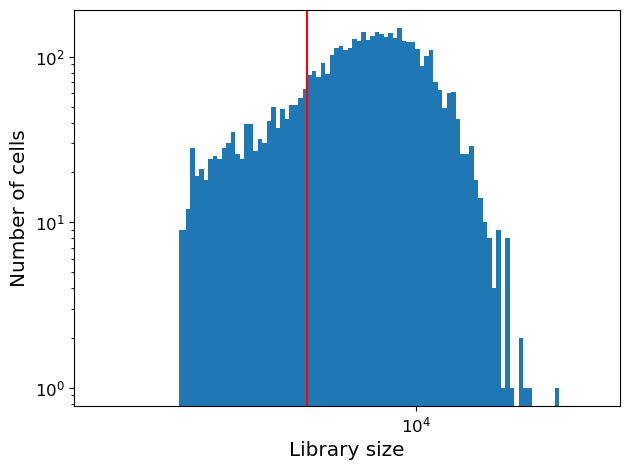

In [6]:
scprep.plot.plot_library_size(T1, percentile=20)

In [7]:
filtered_batches = []
for batch in [T1, T2, T3, T4, T5]:
    batch = scprep.filter.filter_library_size(batch, percentile=20, keep_cells='above')
    batch = scprep.filter.filter_library_size(batch, percentile=75, keep_cells='below')
    filtered_batches.append(batch)
del T1, T2, T3, T4, T5 # removes objects from memory

In [8]:
EBT_counts, sample_labels = scprep.utils.combine_batches(
    filtered_batches, 
    ["Day 00-03", "Day 06-09", "Day 12-15", "Day 18-21", "Day 24-27"],
    append_to_cell_names=True
)
del filtered_batches # removes objects from memory
EBT_counts.head()

,A1BG (ENSG00000121410),A1BG-AS1 (ENSG00000268895),A1CF (ENSG00000148584),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),A2ML1 (ENSG00000166535),A2ML1-AS1 (ENSG00000256661),A2ML1-AS2 (ENSG00000256904),A3GALT2 (ENSG00000184389),A4GALT (ENSG00000128274),...,ZXDC (ENSG00000070476),ZYG11A (ENSG00000203995),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755),ZZZ3 (ENSG00000036549),bP-21264C1.2 (ENSG00000278932),bP-2171C21.3 (ENSG00000279501),bP-2189O9.3 (ENSG00000279579),hsa-mir-1253 (ENSG00000272920)
AAACATTGAAAGCA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCAGAAA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGGAAGGC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACCGGTAT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACCTATTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
EBT_counts = scprep.filter.filter_rare_genes(EBT_counts, min_cells=10)

In [10]:
EBT_counts = scprep.normalize.library_size_normalize(EBT_counts)

/Users/danqiliao/.local/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='Gene expression', ylabel='Number of cells'>

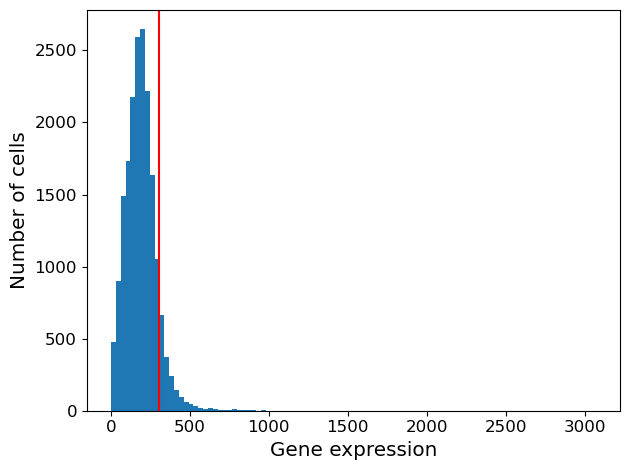

In [11]:
mito_genes = scprep.select.get_gene_set(EBT_counts, starts_with="MT-") # Get all mitochondrial genes. There are 14, FYI.
scprep.plot.plot_gene_set_expression(EBT_counts, genes=mito_genes, percentile=90)

In [12]:
EBT_counts, sample_labels = scprep.filter.filter_gene_set_expression(
    EBT_counts, sample_labels, genes=mito_genes, 
    percentile=90, keep_cells='below')

In [13]:
EBT_counts = scprep.transform.sqrt(EBT_counts)

In [14]:
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate = phate_operator.fit_transform(EBT_counts)

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.45 seconds.
    Calculating KNN search...
    Calculated KNN search in 7.25 seconds.
    Calculating affinities...
    Calculated affinities in 8.06 seconds.
  Calculated graph and diffusion operator in 24.17 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.42 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.91 seconds.
  Calculated landmark operator in 3.87 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.52 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.88 seconds.
Calculated PHATE in 30.44 seconds.


/Users/danqiliao/.local/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE1', ylabel='PHATE2'>

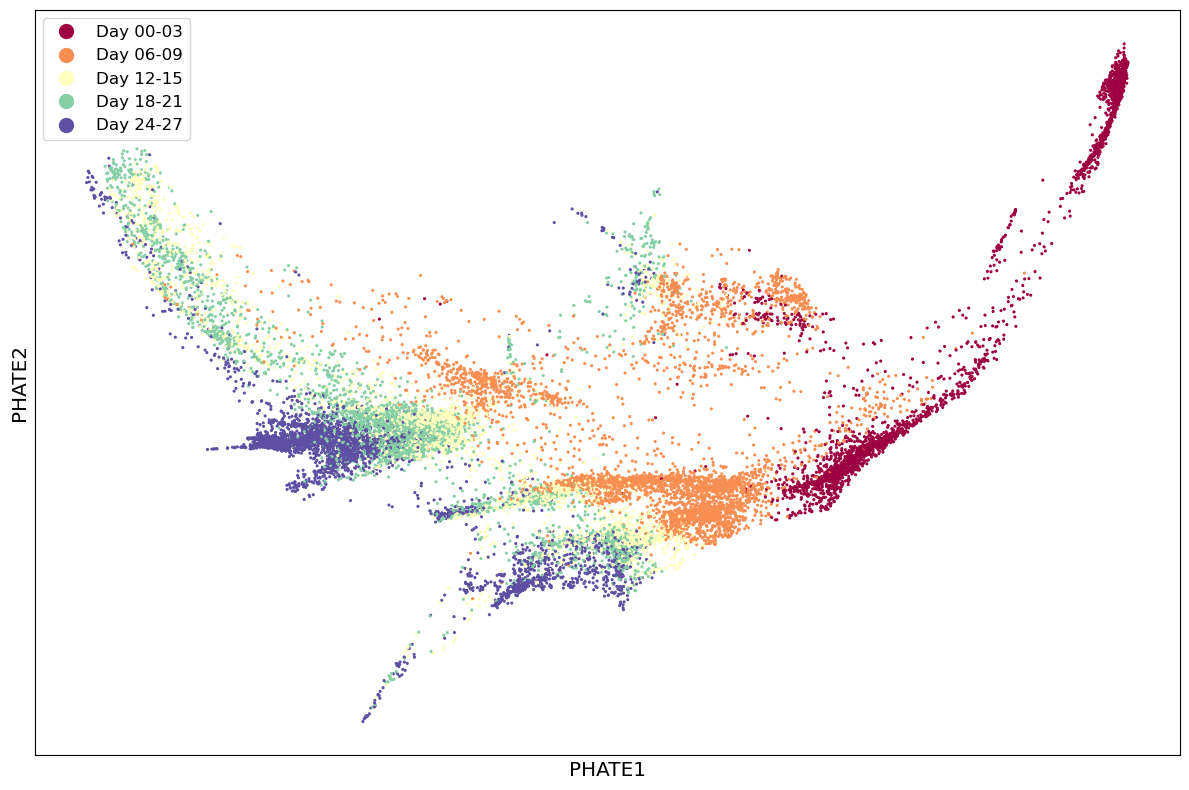

In [15]:
scprep.plot.scatter2d(Y_phate, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

In [16]:
eb_data = anndata.AnnData(X=EBT_counts, obs=pd.DataFrame(index=EBT_counts.index), var=pd.DataFrame(index=EBT_counts.columns))

In [17]:
eb_data.obsm['X_phate'] = Y_phate

In [21]:
Y_phate3d = phate.PHATE(n_components=3, knn=4, decay=15, t=12, n_jobs=-2).fit_transform(EBT_counts)

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.44 seconds.
    Calculating KNN search...
    Calculated KNN search in 7.71 seconds.
    Calculating affinities...
    Calculated affinities in 8.27 seconds.
  Calculated graph and diffusion operator in 24.71 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.36 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.68 seconds.
  Calculated landmark operator in 3.53 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.38 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



  Calculated metric MDS in 13.47 seconds.
Calculated PHATE in 42.11 seconds.


In [22]:
def _samplestr_to_class(sample_labels):
    unique_labels = np.unique(sample_labels)
    str2class = {label: i for i, label in enumerate(unique_labels)}
    return np.array([str2class[label] for label in sample_labels])

sample_classes = _samplestr_to_class(sample_labels)
print(sample_classes)

[0 0 0 ... 4 4 4]


In [27]:
import plotly.graph_objs as go
fig = go.Figure()

for i, label in enumerate(np.unique(sample_classes)):
    idx = np.where(sample_classes == label)[0]
    xs = Y_phate3d[idx]
    print(xs.shape)
    fig.add_trace(go.Scatter3d(x=xs[:, 0], y=xs[:, 1], z=xs[:, 2],
                               mode='markers', marker=dict(size=2)))
fig.show()

(2381, 3)
(4165, 3)
(3278, 3)
(3665, 3)
(3332, 3)


In [19]:
eb_data.obs['sample_labels'] = sample_labels

In [20]:
eb_data.write_h5ad('../data/eb.h5ad')

In [34]:
eb_data

AnnData object with n_obs × n_vars = 16821 × 17845
    obs: 'sample_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_phate'

In [21]:
sc.pp.highly_variable_genes(eb_data)
# sc.pp.highly_variable_genes(
#     adata, n_top_genes=2000, flavor="cell_ranger", batch_key=batch_key
# )


In [22]:
eb_data_hv = eb_data[:,eb_data.var['highly_variable']]

In [23]:
eb_data_hv

View of AnnData object with n_obs × n_vars = 16821 × 1684
    obs: 'sample_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_phate'

In [24]:
phate_operator2 = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate2 = phate_operator2.fit_transform(eb_data_hv.X)

Calculating PHATE...
  Running PHATE on 16821 observations and 1684 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 8.46 seconds.
    Calculating affinities...
    Calculated affinities in 14.18 seconds.
  Calculated graph and diffusion operator in 24.40 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 5.17 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.31 seconds.
  Calculated landmark operator in 8.71 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.38 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.43 seconds.
Calculated PHATE in 35.94 seconds.


<Axes: xlabel='PHATE HVG1', ylabel='PHATE HVG2'>

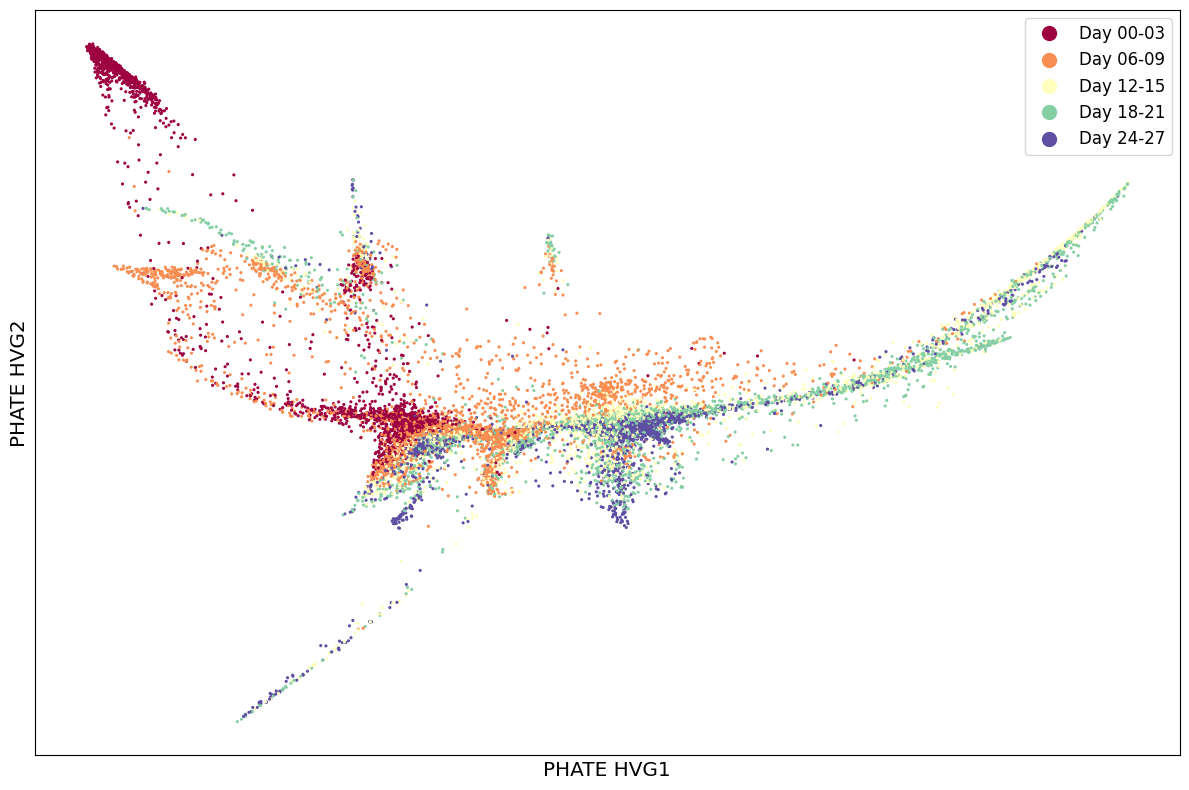

In [34]:
scprep.plot.scatter2d(Y_phate2, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG")

In [25]:
sc.tl.pca(eb_data_hv, svd_solver='arpack', n_comps=50)

/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


In [26]:
phate_operator3 = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate3 = phate_operator3.fit_transform(eb_data_hv.obsm['X_pca'])

Calculating PHATE...
  Running PHATE on 16821 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 4.80 seconds.
    Calculating affinities...
    Calculated affinities in 5.33 seconds.
  Calculated graph and diffusion operator in 10.17 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.40 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.04 seconds.
  Calculated landmark operator in 4.97 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.40 seconds.
Calculated PHATE in 17.91 seconds.


/Users/danqiliao/.local/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE HVG PCA1', ylabel='PHATE HVG PCA2'>

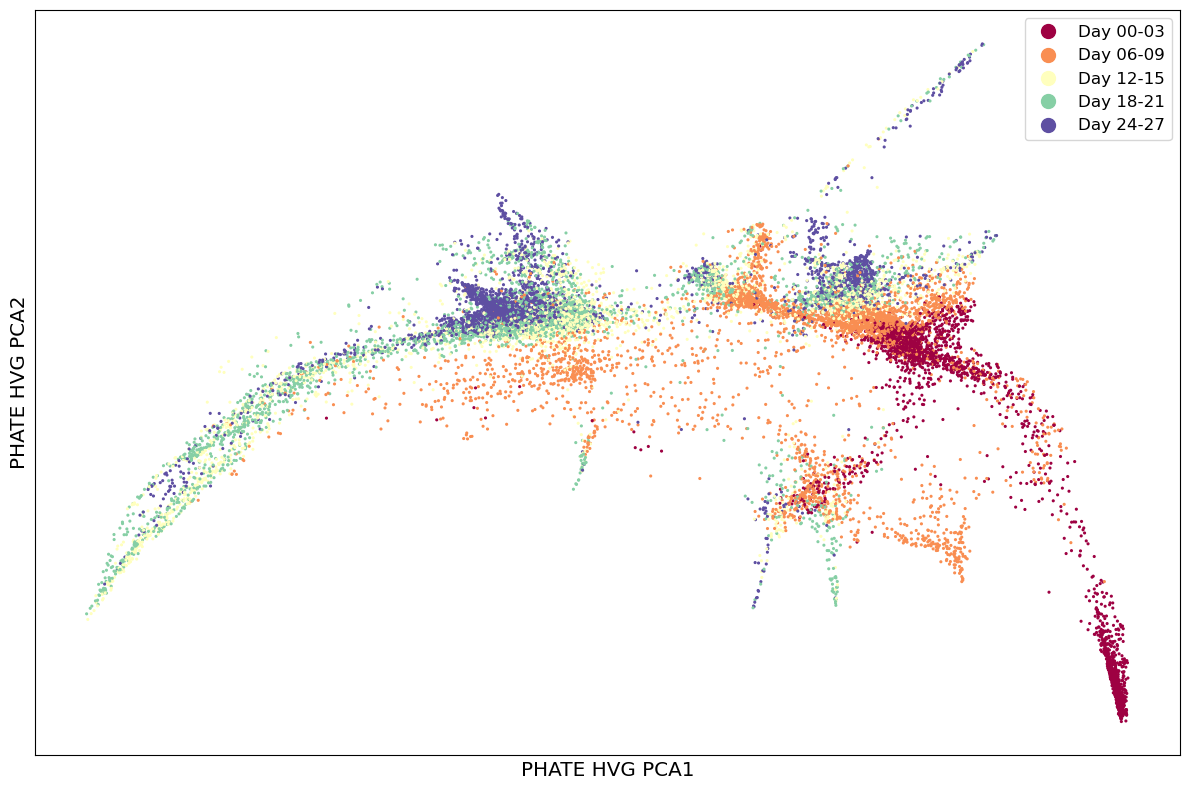

In [27]:
scprep.plot.scatter2d(Y_phate3, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG PCA")

In [28]:
sc.write('../data/eb_hv.h5ad', eb_data_hv)

In [29]:
np.save('../data/eb_hv_pca.npy', eb_data_hv.obsm['X_pca'])

In [30]:
np.random.seed(42)
subset_id = np.random.choice(eb_data_hv.shape[0], size=3000, replace=False)
X_pca_subset = eb_data_hv.obsm['X_pca'][subset_id,:]

In [31]:
phate_operator4 = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate4 = phate_operator4.fit_transform(X_pca_subset)

Calculating PHATE...
  Running PHATE on 3000 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...
    Calculated affinities in 0.19 seconds.
  Calculated graph and diffusion operator in 0.38 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.42 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.30 seconds.
  Calculated landmark operator in 2.02 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.34 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.91 seconds.
Calculated PHATE in 4.66 seconds.


/Users/danqiliao/.local/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE HVG PCA1', ylabel='PHATE HVG PCA2'>

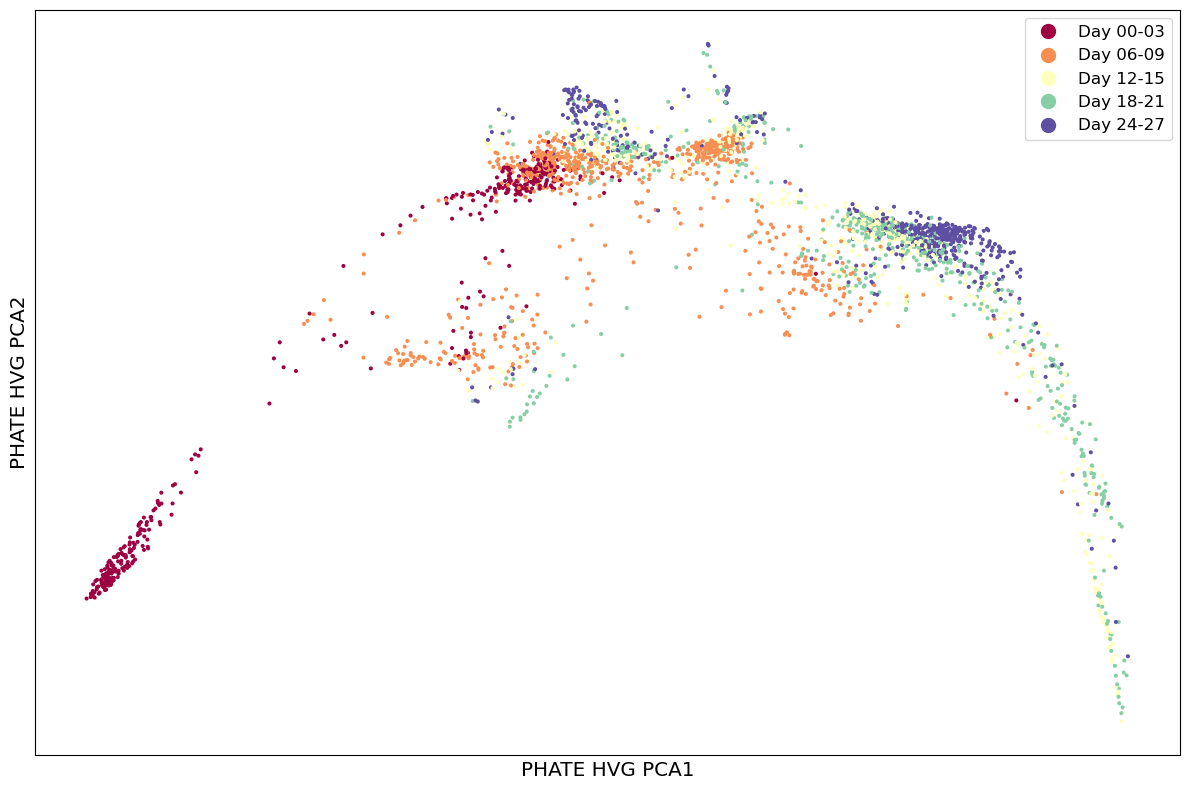

In [32]:
scprep.plot.scatter2d(Y_phate4, c=sample_labels[subset_id], figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG PCA")

In [33]:
np.save('../data/eb_hv_pca_subset.npy', X_pca_subset)

### Convert data to correct dict format for train.py script

In [63]:
eb_data_hv

AnnData object with n_obs × n_vars = 16821 × 1684
    obs: 'sample_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_phate', 'X_pca'
    varm: 'PCs'

In [ ]:
label2idx = {label: idx for idx, label in enumerate(np.unique(sample_labels))}
label2idx

In [ ]:
colors = [label2idx[label] for label in sample_labels]

In [84]:
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split
import scipy.sparse as sp


def convert_data(X, colors, seed=42, test_size=0.2, knn=5, t=30, n_components=3, decay=40):
    # if X is sparse, convert to dense
    if sp.issparse(X):
        X = X.toarray()
        
    # phate_op = phate.PHATE(random_state=42, knn=20, t=30, n_components=3, decay=5)
    phate_op = phate.PHATE(random_state=seed, t=t, n_components=n_components, knn=knn, decay=decay)
    phate_data = phate_op.fit_transform(X)
    # colors = np.zeros(X.shape[0])
    dists_all = squareform(pdist(phate_op.diff_potential))
    ids = np.arange(0, X.shape[0])
    id_train, id_test = train_test_split(ids, test_size=test_size, random_state=seed)
    is_train = np.isin(ids, id_train)
    X_train = X[is_train]
    # phate_op = phate.PHATE(random_state=seed, knn=20, t=30, n_components=3, decay=5)
    phate_op = phate.PHATE(random_state=seed, t=t, n_components=n_components, knn=knn, decay=decay)
    _ = phate_op.fit_transform(X_train)
    dists = dists_all.copy()
    dists_train = squareform(pdist(phate_op.diff_potential))
    dists[is_train][:,is_train] = dists_train
    return dict(
        data=X,
        colors=colors,
        dist=dists,
        dist_all=dists_all, # deprecated.
        phate=phate_data,
        is_train=is_train
    )

In [85]:
converted_data = convert_data(eb_data_hv.X, colors, seed=42, test_size=0.2, knn=5, t=30, n_components=2, decay=40)

Calculating PHATE...
  Running PHATE on 16821 observations and 1684 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 14.44 seconds.
    Calculating affinities...
    Calculated affinities in 5.56 seconds.
  Calculated graph and diffusion operator in 30.18 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.05 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.95 seconds.
  Calculated landmark operator in 3.52 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.65 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.48 seconds.
Calculated PHATE in 36.84 seconds.
Calculating PHATE...
  Running PHATE on 13456 observations and 1684 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 12.33 seconds.
    Calculating KNN searc

In [87]:
# save converted data in npz format
np.savez('../data/EB_phate.npz', **converted_data)

In [88]:
data = np.load('../data/EB_phate.npz', allow_pickle=True)

In [89]:
data['data']


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.02286069, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.11221013, 0.        , ..., 1.11221013, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:

data = np.load('../data/EB_phate.npz', allow_pickle=True)
data_dict = {f: data[f] for f in data.files}
# WDiscrminator Data.
import sys
import os
sys.path.append('../src')
from negative_sampling import add_negative_samples

data_dict = {f: data[f] for f in data.files}
noise_type = 'gaussian'
noise_level = 0.5
mask_dist = False
seed = 32
data_dict = add_negative_samples(data_dict.copy(), 
                                 subset_rate=1., 
                                 noise_rate=noise_level, 
                                 seed=seed, 
                                 noise=noise_type, 
                                 mask_dists=mask_dist, 
                                 shell=True)
os.makedirs('../data/negative_sampled', exist_ok=True)
np.savez('../data/negative_sampled/EB_phate.npz', **data_dict)

### Load EB data and then get the first 50 PCA

In [20]:
rp = '../data/eb_hv.h5ad'
eb_data = anndata.read_h5ad(rp)

eb_data.obsm['X_pca'].shape

(16821, 50)

In [21]:
pca_data = np.load('../data/eb_hv_pca.npy')
pca_data.shape

(16821, 50)

: 